In [58]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np

results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['id'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['id', 'initializationTime', 'executionTime', 'totalTime', 'algorithm','timestamp'])
results

,id,initializationTime,executionTime,totalTime,algorithm,timestamp
0,graph1,0.000018,0.004740,0.004758,parallel2,20240829151444
1,graph1,0.000020,0.005647,0.005667,parallel2,20240829152932
2,graph1,0.528963,0.006285,0.535248,parallel,
3,graph1,0.000004,0.000003,0.000007,serial,
4,graph2,0.000022,0.005036,0.005058,parallel2,20240829151444
5,graph2,0.000019,0.005001,0.005020,parallel2,20240829152932
6,graph2,1.090638,0.004188,1.094826,parallel,
7,graph2,0.000004,0.000005,0.000010,serial,
8,graph3,0.000043,0.007009,0.007052,parallel2,20240829151445
9,graph3,0.000043,0.008166,0.008210,parallel2,20240829152933


In [59]:
mean_results = results.groupby(['id', 'algorithm'])[['initializationTime', 'executionTime', 'totalTime']].mean().reset_index()
mean_results

,id,algorithm,initializationTime,executionTime,totalTime
0,graph1,parallel,0.528963,0.006285,0.535248
1,graph1,parallel2,0.000019,0.005194,0.005213
2,graph1,serial,0.000004,0.000003,0.000007
3,graph2,parallel,1.090638,0.004188,1.094826
4,graph2,parallel2,0.000021,0.005019,0.005039
5,graph2,serial,0.000004,0.000005,0.000010
6,graph3,parallel,0.483932,0.009439,0.493371
7,graph3,parallel2,0.000043,0.007587,0.007631
8,graph3,serial,0.000039,0.000944,0.000984
9,graph4,parallel,0.496758,0.032137,0.528896


In [60]:
serial_results = mean_results[mean_results['algorithm'] == 'serial']
parallel_results = mean_results[mean_results['algorithm'] == 'parallel']
parallel2_results = mean_results[mean_results['algorithm'] == 'parallel2']
#serial_results = mean_results[mean_results['algorithm'] == 'serial'][:groups]
#parallel_results = mean_results[mean_results['algorithm'] == 'parallel'][:groups]
#parallel2_results = mean_results[mean_results['algorithm'] == 'parallel2'][:groups]
#x = np.arange(groups)
x_serial = np.arange(len(serial_results))-0.2
x_parallel = np.arange(len(parallel_results))
x_parallel2 = np.arange(len(parallel2_results))+0.2
width = 0.2
max_length = max(len(serial_results),len(parallel_results),len(parallel2_results))
ticks = [f'graph_{i}' for i in range(1, max_length+1)]

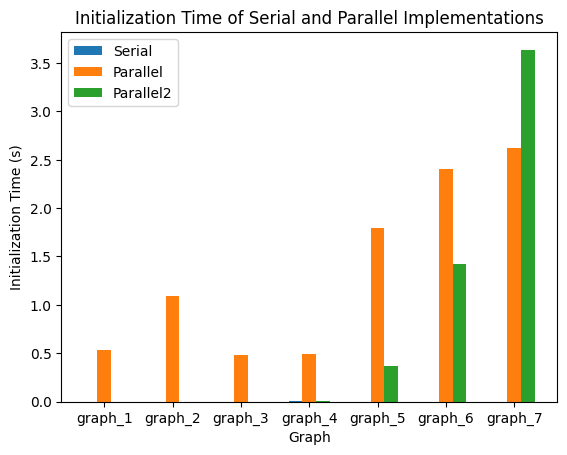

In [61]:
plt.bar(x_serial, serial_results['initializationTime'], label='Serial', width=width)
plt.bar(x_parallel, parallel_results['initializationTime'], label='Parallel', width=width)
plt.bar(x_parallel2, parallel2_results['initializationTime'], label='Parallel2', width=width)
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Initialization Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

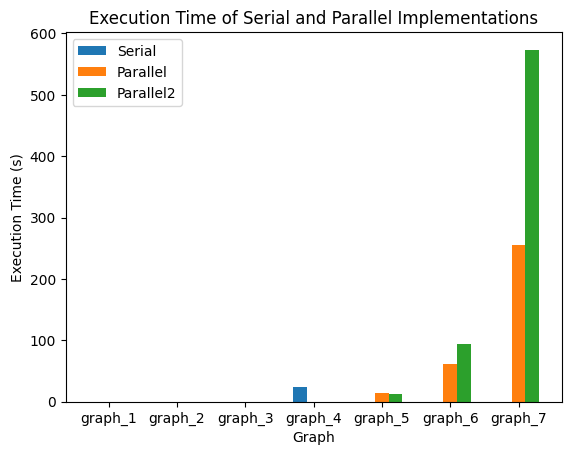

In [62]:
plt.bar(x_serial, serial_results['executionTime'], label='Serial', width=width)
plt.bar(x_parallel, parallel_results['executionTime'], label='Parallel', width=width)
plt.bar(x_parallel2, parallel2_results['executionTime'], label='Parallel2', width=width)
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Execution Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.show()

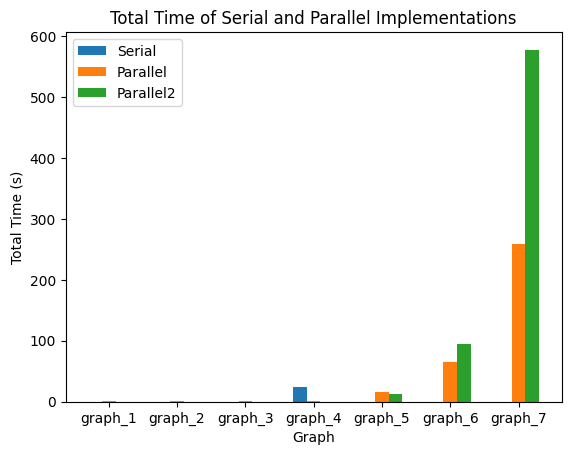

In [63]:
plt.bar(x_serial, serial_results['totalTime'], label='Serial', width=width)
plt.bar(x_parallel, parallel_results['totalTime'], label='Parallel', width=width)
plt.bar(x_parallel2, parallel2_results['totalTime'], label='Parallel2', width=width)
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Total Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Total Time (s)')
plt.show()

<BarContainer object of 7 artists>

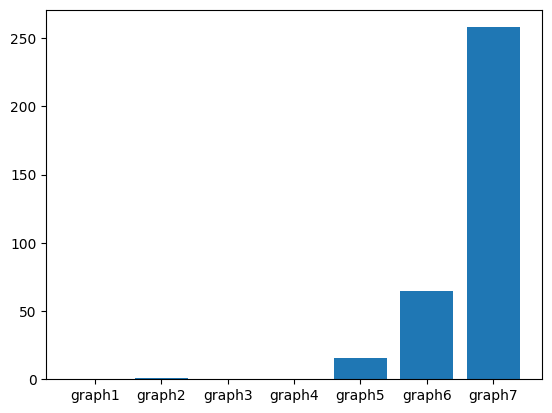

In [64]:
parallel_results = results[results['algorithm'] == 'parallel']
plt.bar(parallel_results['id'], parallel_results['totalTime'], label='Parallel')